# Examen parcial 2 (raizes y ~interpolacion)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [27]:
# tu codigo:

def f_cost(x,c):
    return ((x+1)**2)-c*(x-1)



In [31]:
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt

## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (50 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

Text(0, 0.5, 'Comportamiento')

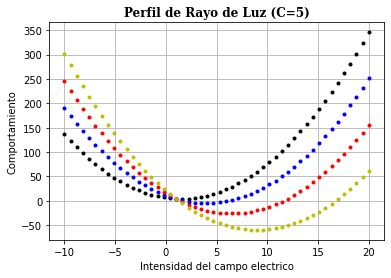

In [37]:
# tu codigo:


x=np.linspace(-10,20,50)
fig,ax = plt.subplots(1,1)
ax.plot(x,f_cost(x,5),'.k')
ax.plot(x,f_cost(x,10),'.b')
ax.plot(x,f_cost(x,15),'.r')
ax.plot(x,f_cost(x,20),'.y')
ax.grid('True')
plt.title("Perfil de Rayo de Luz (C=5)", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold'})

plt.xlabel("Intensidad del campo electrico" )
plt.ylabel("Comportamiento")

## 2a. Para cual `c` esta funcion no tiene raices?

In [63]:
# tu respuesta

c= 5

try:
  root = optimize.newton(f_cost, 1,args=(c,))
except:
  root=np.nan
print(root)

#Como se puede observar, falla al converger hacia un valor especifico, por ende para c=5 la funcion no tiene raices.

nan


## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [64]:
# tu codigo:


def root_finding(f_cost,start,c): 
    try:
        root = optimize.newton(f_cost, start,args=(c,))
    except:
        root=np.nan
    return root



## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [83]:
# tu codigo:

c_vec=np.linspace(5,100,50)
left_roots=[]
start=0

for c in c_vec:
    try:
        root = root_finding(f_cost,start,c)
    except:
        root=np.nan
        
    left_roots.append(root)

print(left_roots)

[nan, nan, 2.0432017969337366, 1.648529803597468, 1.4835873667158805, 1.3881330453918561, 1.3250010644640304, 1.2798858084347267, 1.2459379331025728, 1.2194238886080733, 1.198121475305182, 1.180620256095696, 1.1659797430445376, 1.1535477166378112, 1.1428571428571428, 1.1335645419651614, 1.125411519703276, 1.118199873373322, 1.1117749793372864, 1.1060144086771908, 1.1008199427305063, 1.0961118576172002, 1.0918247580755427, 1.087904490947587, 1.0843058248747457, 1.0809906827739744, 1.077926779103681, 1.0750865575996467, 1.0724463548328165, 1.0699857354333249, 1.0676869591920624, 1.0655345504635667, 1.063514947646537, 1.0616162158746472, 1.0598278099956069, 1.0581403778521943, 1.056545596084575, 1.0550360323451062, 1.0536050290948533, 1.052246605135765, 1.0509553717967868, 1.049726461289723, 1.0485554652208313, 1.0474383816164656, 1.0463715691176874, 1.0453517072363814, 1.0443757617568101, 1.0434409545214791, 1.0425447369662688, 1.0416847668727875]


## 4b 
Hacer un gráfico de raíz izquierda vs c

Text(0, 0.5, 'Raiz Izquierda')

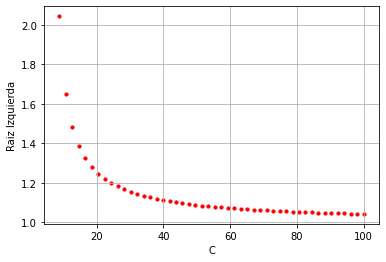

In [89]:
# tu codigo:

import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.scatter(c_vec,left_roots,s=10,c='r')
ax.grid('True')
ax.set_xlabel('C')
ax.set_ylabel('Raiz Izquierda')


## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [85]:
# tu codigo:

c_vec=np.linspace(5,100,50)
right_roots=[]
start=100

for c in c_vec:
    try:
        root = root_finding(f_cost,start,c)
    except:
        root=np.nan
        
    right_roots.append(root)

print(right_roots)

[nan, nan, 4.834349223474424, 7.167796727014783, 9.271514674100445, 11.305744505628551, 13.307651996760457, 15.291542762993851, 17.264266148530055, 19.22955570322866, 21.18963362673563, 23.1459103561492, 25.09932637940444, 27.050533916015247, 29.0, 30.948068111096056, 32.894996643562024, 34.840983800096076, 36.78618420433619, 38.73072028520036, 40.67469026135112, 42.61817385666851, 44.56123646641426, 46.503932243746284, 48.44630642002323, 50.388397072328075, 52.330236486202445, 54.271852217910556, 56.21326793088147, 58.15450406048505, 60.09557834693039, 62.036506265862975, 63.97730137888406, 65.91797562086008, 67.85853953694317, 69.79900247929066, 71.73937277126238, 73.67965784520591, 75.61986435866025, 77.55999829282342, 79.50006503636646, 81.44006945707764, 83.38001596335059, 85.31990855715904, 87.25975087986191, 89.19954625194728, 91.13929770763093, 93.07900802507037, 95.01867975282966, 96.9583152331272]


## 5b
* Hacer un gráfico de raíz derecha vs c

Text(0, 0.5, 'Raiz Derecha')

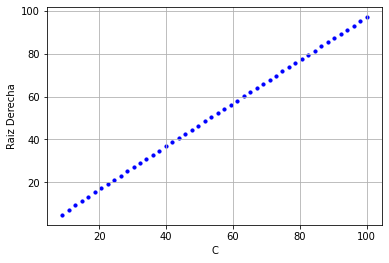

In [88]:
# tu codigo:

import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.scatter(c_vec,right_roots,s=10,c='b')
ax.grid('True')
ax.set_xlabel('C')
ax.set_ylabel('Raiz Derecha')

## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

In [ ]:
# respuesta:
# [0,20]
# Se encuentra convergiendo a 1
# Lineal
#
#

# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	2.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	2.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	2.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	2.0p`

`- Total:                                                          (max 10.0p):   10.0p`
`